# Loading the data

In [10]:
import pandas as pd
df=pd.read_csv('/content/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Preprocessing the Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Separating categorical and numerical Values

In [12]:
cat= []
num= []
for i in df.columns:
  if df[i].dtype== 'object':
    cat.append(i)
  else:
    num.append(i)

In [13]:
cat

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

In [14]:
num

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

# Treating Numerical Values

Percentage of outliers in Year 2.3255813953488373


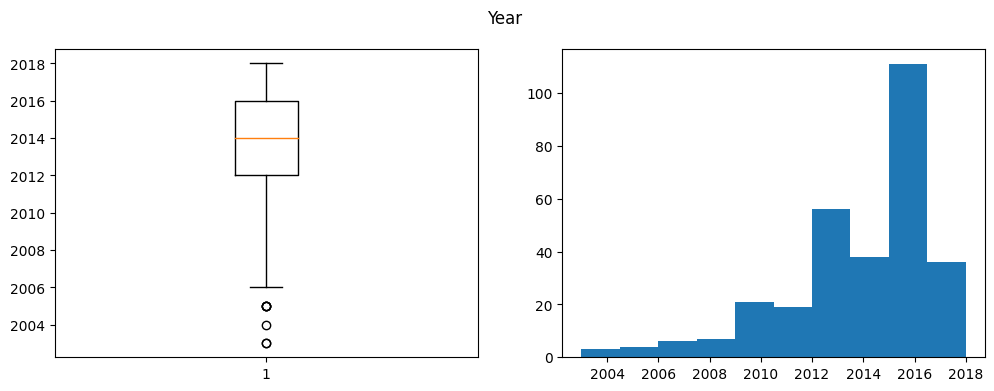

None
+++====+++
Percentage of outliers in Selling_Price 5.647840531561462


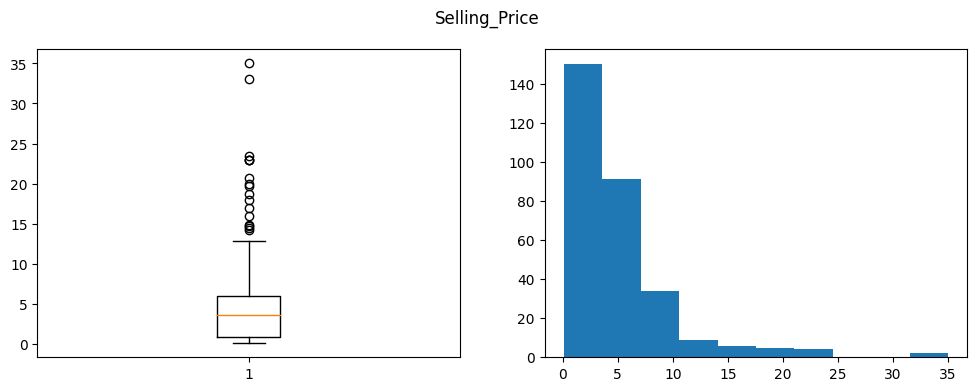

None
+++====+++
Percentage of outliers in Present_Price 4.651162790697675


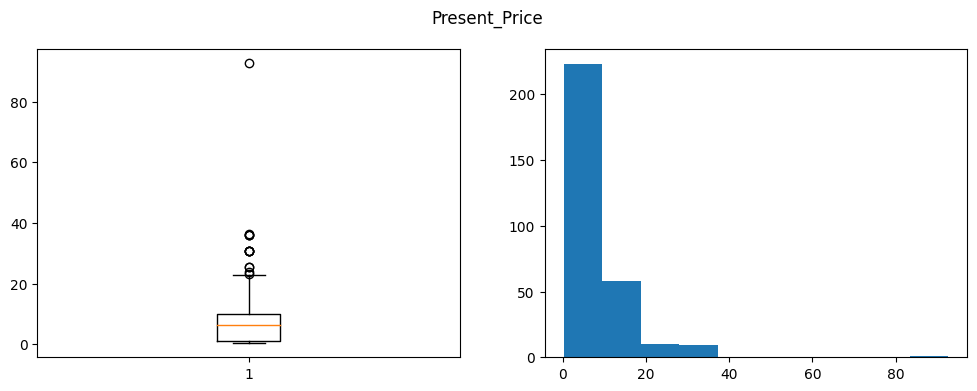

None
+++====+++
Percentage of outliers in Driven_kms 2.6578073089700998


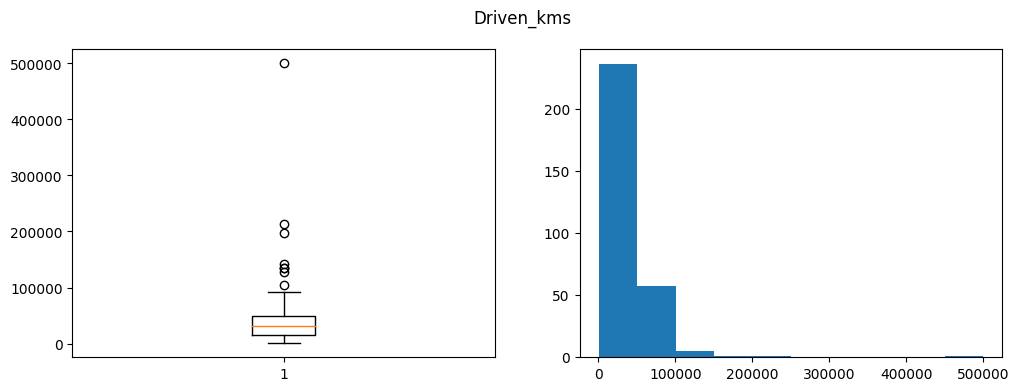

None
+++====+++
Percentage of outliers in Owner 3.654485049833887


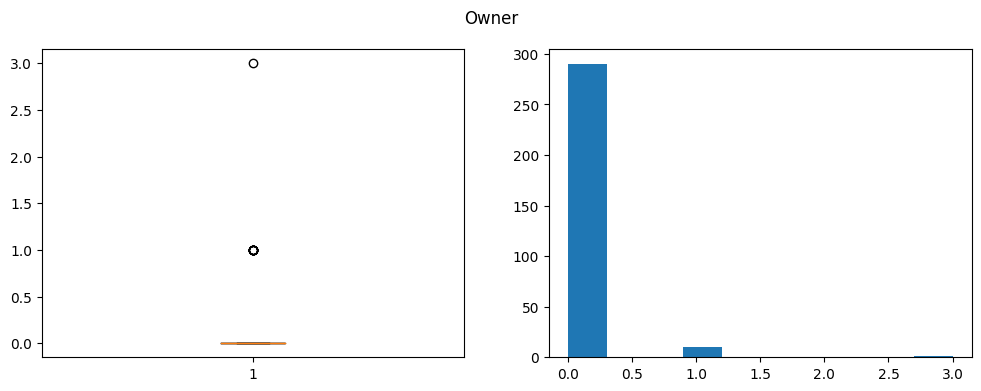

None
+++====+++


In [15]:
# calculating the % of outliers & treating them
import matplotlib.pyplot as plt
def outlier_detection_treatment(col):
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3-q1
    lf= q1- 1.5*iqr
    uf= q3+ 1.5*iqr
    outliers= df[(df[col]<lf) | (df[col]>uf)]
    print("Percentage of outliers in", col ,outliers.shape[0]*100/df.shape[0])
    fig, ax= plt.subplots(1,2, figsize=(12,4))
    ax[0].boxplot(df[col])
    ax[1].hist(df[col])
    plt.suptitle(col)
    plt.show()
    df.loc[(df[col]<lf) | (df[col]>uf), col]= df[col].median()

for col in num:
    print(outlier_detection_treatment(col))
    print("+++====+++")

In [16]:
# Finding the unique values in each column
for i in df:
  print(i)
  print('Unique Values:',df[i].unique())
  print('Number of Unique Values:',df[i].nunique())
  print()
  print()

Car_Name
Unique Values: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger 

# Treating Categorical Values

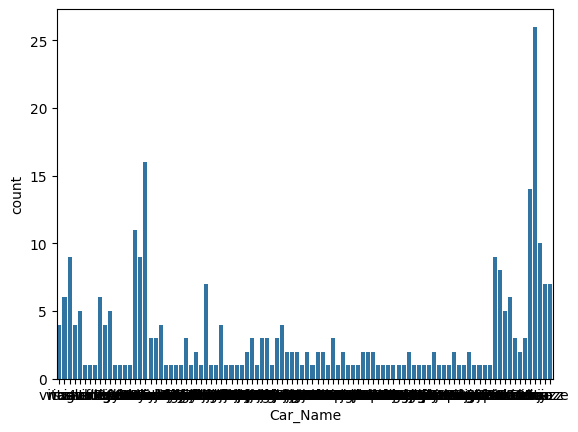

None


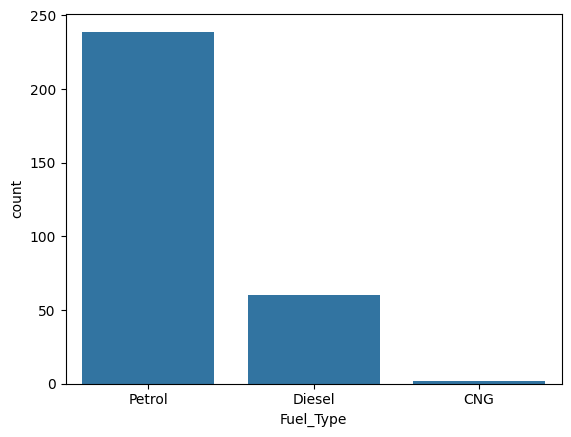

None


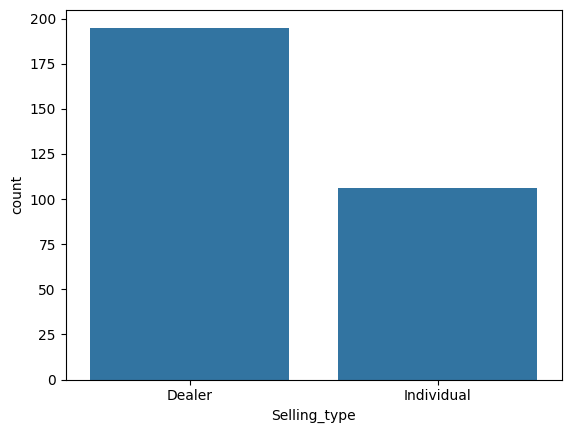

None


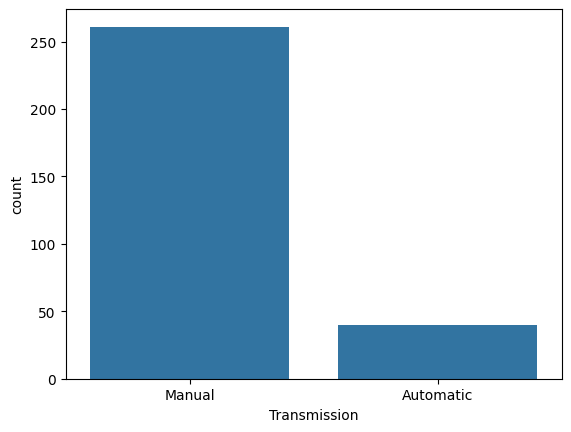

None


In [17]:
import seaborn as sns

def cat_analysis(col):
    df[col].value_counts()
    sns.countplot(x=df[col])
    plt.show()

for i in cat:
    print(cat_analysis(i))

In [18]:
df=df.drop(['Transmission','Fuel_Type'],axis=1)

In [19]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Owner
0,ritz,2014,3.35,5.59,27000,Dealer,0
1,sx4,2013,4.75,9.54,43000,Dealer,0
2,ciaz,2017,7.25,9.85,6900,Dealer,0
3,wagon r,2011,2.85,4.15,5200,Dealer,0
4,swift,2014,4.60,6.87,42450,Dealer,0
...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Dealer,0
297,brio,2015,4.00,5.90,60000,Dealer,0
298,city,2009,3.35,11.00,87934,Dealer,0
299,city,2017,11.50,12.50,9000,Dealer,0


# Encoding the Categorical Data

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le= LabelEncoder()
df['Selling_type']= le.fit_transform(df['Selling_type'])

In [22]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Owner
0,ritz,2014,3.35,5.59,27000,0,0
1,sx4,2013,4.75,9.54,43000,0,0
2,ciaz,2017,7.25,9.85,6900,0,0
3,wagon r,2011,2.85,4.15,5200,0,0
4,swift,2014,4.60,6.87,42450,0,0
...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,0
297,brio,2015,4.00,5.90,60000,0,0
298,city,2009,3.35,11.00,87934,0,0
299,city,2017,11.50,12.50,9000,0,0


In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
ohe= OneHotEncoder(sparse_output= False)
np_car_name= ohe.fit_transform(df[["Car_Name"]])
df_car_name= pd.DataFrame(np_car_name,columns= ohe.categories_ )
df_car_name.drop('wagon r', axis= 1, inplace=True)

In [25]:
df_car_name

,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,...,jazz,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,xcent
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting the Independent and Dependent Variables

In [26]:
X= df.drop(['Present_Price', 'Car_Name'], axis= 1)
X= pd.concat([X, df_car_name], axis= 1)
X

,Year,Selling_Price,Driven_kms,Selling_type,Owner,"(800,)","(Activa 3g,)","(Activa 4g,)","(Bajaj ct 100,)","(Bajaj Avenger 150,)",...,"(jazz,)","(land cruiser,)","(omni,)","(ritz,)","(s cross,)","(swift,)","(sx4,)","(verna,)","(vitara brezza,)","(xcent,)"
0,2014,3.35,27000,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,4.75,43000,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2017,7.25,6900,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011,2.85,5200,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014,4.60,42450,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,33988,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,2015,4.00,60000,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,2009,3.35,87934,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,2017,11.50,9000,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
y= df['Present_Price']

In [28]:
X= X.values
y= y.values

# Segmenting Training and Testing Data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state= 90)

In [31]:
x_train.shape

(210, 102)

In [32]:
x_test.shape

(91, 102)

In [33]:
y_train.shape

(210,)

In [34]:
y_test.shape

(91,)

# Applying Linear Regression Model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train_lr = model.predict(x_train)
y_pred_test_lr = model.predict(x_test)

print('Training Data Evaluation')
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_lr))
print("R^2 Score:", r2_score(y_train, y_pred_train_lr))

print('\nTesting Data Evaluation')
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_test_lr))
print("R^2 Score:", r2_score(y_test, y_pred_test_lr))

Training Data Evaluation
Mean Squared Error: 0.7496442632018482
R^2 Score: 0.9675691509122802

Testing Data Evaluation
Mean Squared Error: 7.597782501906024
R^2 Score: 0.7536294993792256


# Applying Polynomial Regression Model

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe=Pipeline([
    ('poly',PolynomialFeatures()),
    ('linear',LinearRegression())
])

grid={
    'poly__degree':[1,2,3,4]
}

grid_poly=GridSearchCV(pipe,grid,cv=5)
grid_poly.fit(x_train, y_train)

y_train_pred_poly = grid_poly.predict(x_train)
y_test_pred_poly = grid_poly.predict(x_test)

# Evaluate the model
print("Training Data Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_train, y_train_pred_poly))
print("R^2 Score:", r2_score(y_train, y_train_pred_poly))

print("\nTesting Data Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred_poly))
print("R^2 Score:", r2_score(y_test, y_test_pred_poly))

Training Data Evaluation:
Mean Squared Error: 0.7496442632018486
R^2 Score: 0.9675691509122802

Testing Data Evaluation:
Mean Squared Error: 7.597782501888026
R^2 Score: 0.7536294993798093


# Applying Support Vector Regressor Model

In [37]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

svr_pipeline = make_pipeline(StandardScaler(), SVR())
param_grid = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [0.01, 0.1, 0.5, 1.0],
    'svr__gamma': ['scale', 'auto']
}

# RandomizedSearchCV to speed up the search
random_search = RandomizedSearchCV(svr_pipeline, param_grid, n_iter=10, cv=5, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
random_search.fit(x_train, y_train)

# Predictions and evaluation
y_pred_train_svr = random_search.best_estimator_.predict(x_train)
y_pred_test_svr = random_search.best_estimator_.predict(x_test)

print("Training Data Evaluation:")
print('SVR RMSE:',mean_squared_error(y_train,y_pred_train_svr)**0.5)
print('SVR R2 Score:',r2_score(y_train,y_pred_train_svr))

y_pred_test_svr=random_search.predict(x_test)

print("\nTesting Data Evaluation:")
print('SVR RMSE:',mean_squared_error(y_test,y_pred_test_svr))
print('SVR R2 Score:',r2_score(y_test,y_pred_test_svr))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training Data Evaluation:
SVR RMSE: 0.9631322023870866
SVR R2 Score: 0.959869469117209

Testing Data Evaluation:
SVR RMSE: 8.501772154547355
SVR R2 Score: 0.7243161591748473


# Applying Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid={
    'max_depth':[10, 15, 20, 25, 30],
    'min_samples_split':[5,10,15],
    'min_samples_leaf':[2,4,6],
    'criterion':[ 'squared_error'],
    'max_features': ['sqrt']
}

gridtree=GridSearchCV(DecisionTreeRegressor(random_state=0),param_grid,cv=7,scoring='neg_mean_squared_error',verbose=2, n_jobs=-1)

gridtree.fit(x_train,y_train)

best_model = gridtree.best_estimator_

y_pred_traindt=best_model.predict(x_train)
y_pred_testdt=best_model.predict(x_test)

print("Training Data Evaluation:")
print('Decision Tree RMSE:',mean_squared_error(y_train,y_pred_traindt)**0.5)
print('Decision Tree R2 Score:',r2_score(y_train,y_pred_traindt))

print("\nTesting Data Evaluation:")
print('Decision Tree RMSE:',mean_squared_error(y_test,y_pred_testdt))
print('Decision Tree R2 Score:',r2_score(y_test,y_pred_testdt))

Fitting 7 folds for each of 45 candidates, totalling 315 fits
Training Data Evaluation:
Decision Tree RMSE: 3.0631020213258457
Decision Tree R2 Score: 0.5940934857017186

Testing Data Evaluation:
Decision Tree RMSE: 16.320437196033673
Decision Tree R2 Score: 0.470783181628584


# Applying Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
param_grid_rf = {
    'n_estimators': [50, 100, 150],                # Reduce the number of trees
    'max_depth': [5, 10, 15, 20],                     # Limit tree depth
    'min_samples_split': [10, 15, 20, 25, 30],             # Require more samples to split nodes
    'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10],                 # Require more samples in leaf nodes
    'criterion': ['squared_error', 'friedman_mse'],# Use general criteria (reduce overfitting)
    'max_features': ['sqrt', 'log2']               # Limit number of features for splits
}

gridrf=GridSearchCV(RandomForestRegressor(random_state=0),param_grid_rf,cv=8, scoring='neg_mean_squared_error',verbose=2, n_jobs=-1)

gridrf.fit(x_train,y_train)

y_pred_trainrf=gridrf.predict(x_train)
y_pred_testrf=gridrf.predict(x_test)

print("Training Data Evaluation:")
print('Random Forest RMSE:',mean_squared_error(y_train,y_pred_trainrf)**0.5)
print('Random Forest R2 Score:',r2_score(y_train,y_pred_trainrf))

print("\nTesting Data Evaluation:")
print('Random Forest RMSE:',mean_squared_error(y_test,y_pred_testrf))
print('Random Forest R2 Score:',r2_score(y_test,y_pred_testrf))

Fitting 8 folds for each of 1680 candidates, totalling 13440 fits
Training Data Evaluation:
Random Forest RMSE: 3.3776934711417606
Random Forest R2 Score: 0.5064358965515198

Testing Data Evaluation:
Random Forest RMSE: 19.882322719393283
Random Forest R2 Score: 0.3552832289353014


# Comparing all the models

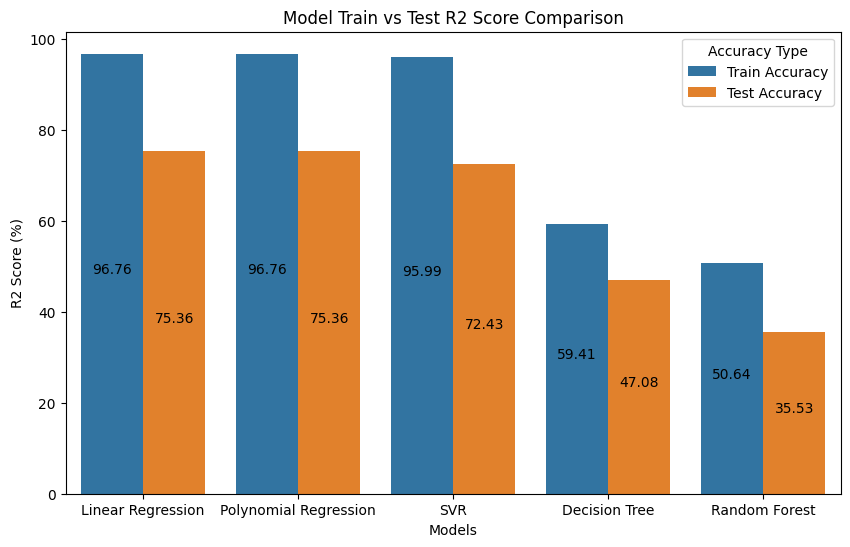

In [41]:
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy scores for training and test data
train_score1 = metrics.r2_score(y_train, y_pred_train_lr)*100
train_score2 = metrics.r2_score(y_train, y_train_pred_poly)*100
train_score3 = metrics.r2_score(y_train, y_pred_train_svr)*100
train_score4 = metrics.r2_score(y_train, y_pred_traindt)*100
train_score5 = metrics.r2_score(y_train, y_pred_trainrf)*100

test_score1 = metrics.r2_score(y_test, y_pred_test_lr)*100
test_score2 = metrics.r2_score(y_test, y_test_pred_poly)*100
test_score3 = metrics.r2_score(y_test, y_pred_test_svr)*100
test_score4 = metrics.r2_score(y_test, y_pred_testdt)*100
test_score5 = metrics.r2_score(y_test, y_pred_testrf)*100

# Create a DataFrame for plotting
final_data = pd.DataFrame({
    'MODELS': ['Linear Regression', 'Polynomial Regression', 'SVR', 'Decision Tree', 'Random Forest'],
    "Train Accuracy": [train_score1, train_score2, train_score3, train_score4, train_score5],
    "Test Accuracy": [test_score1, test_score2, test_score3, test_score4, test_score5]
})

# Melt the DataFrame
final_data_melted = pd.melt(final_data, id_vars=['MODELS'], var_name='Accuracy Type', value_name='Accuracy')

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='MODELS', y='Accuracy', hue='Accuracy Type', data=final_data_melted)

# Add labels on top of each bar
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='center', padding=3)

# Set labels and title
plt.xlabel('Models')
plt.ylabel('R2 Score (%)')
plt.title('Model Train vs Test R2 Score Comparison')

# Display the plot
plt.show()